### Задача 2.3
Известно, что электричка "Вашингтон-Петушки" аварийно останавливается раз в несколько дней. Аналитики РЖД проанализировали, сколько дней электричка едет без поломок, и составили выборку: $x = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15)$.

РЖД хочет проверить гипотезу, что дисперсия распределения равна $9$ против правосторонней альтернативы.

Требуется:

Ввести предположение, каким распределением описывается данная выборка.
Записать задачу формально.
* Предложить критерий для оценки дисперсии распределения.
* Проверить гипотезу о значении дисперсии распределения для уровня значимости $\alpha = 0.05$ аналитически.
* Вывести и получить доверительный интервал для значения дисперсии при $\alpha = 0.05$.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для  подстановвки численых значений в финальную формулу)

In [2]:
import seaborn as sns
import numpy as np 
import pylab
import matplotlib.pyplot as plt 
import scipy.stats as st

x = [3, 22, 13, 6, 18, 5, 6, 10, 7, 15]
logx = np.log(x)
mu = np.mean(x)
median = np.median(x)
n = len(x)
std = np.std(x, ddof=1)

Попробуем определить, каким распределением можно описать данную выборку. Наиболее часто встречающиееся распределение - нормальное; опоздания транспорта часто описывается распределением Пуассона. Поэтому они в первую очередь попадают в кандидаты. Также можно проверить логнормальное распределение (оно отпало почти сразу). 

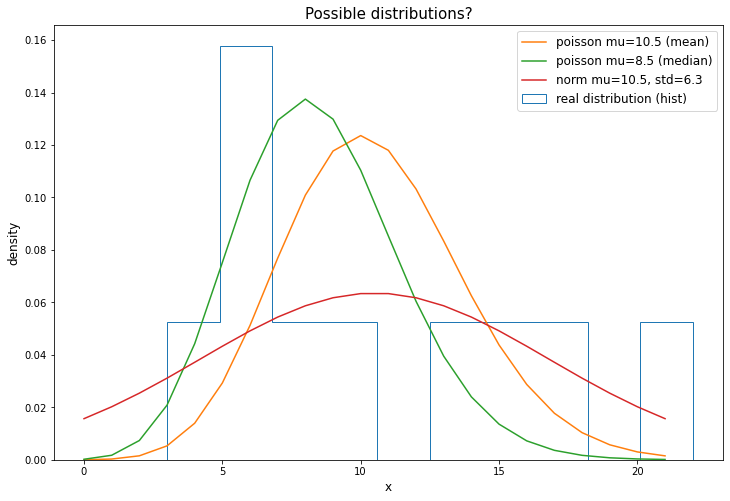

In [3]:
plt.figure(figsize=(12, 8))
plt.hist(x, bins=n, density=True, histtype='step', label='real distribution (hist)')
t = np.arange(0, max(x), 1)
y1 = st.poisson.pmf(t, mu=mu)
y2 = st.poisson.pmf(t, mu=np.median(x))
y3 = st.norm.pdf(t, mu, std)
plt.plot(t, y1, label='poisson mu={} (mean)'.format(mu))
plt.plot(t, y2, label='poisson mu={} (median)'.format(median))
plt.plot(t, y3, label='norm mu={}, std={}'.format(mu, round(std, 1)))
plt.xlabel('x', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.legend(fontsize=12)
plt.title('Possible distributions?', fontsize=15)
plt.show()

Ну при визуальном осмотре мало что можно сказать...(хотя нормальное распределение с виду подходит лучше, чем другие)

Проверим с помощью различных тестов

In [4]:
print('Shapiro:\nT = {}\np_value = {}\n\n'.format(*st.shapiro(x)))
print('Jarque-Bera:\nT = {}\np_value = {}\n\n'.format(*st.jarque_bera(x)))
print('Kolmogorov–Smirnov(norm):\nT = {}\np_value = {}\n\n'.format(*st.kstest(x, st.norm.rvs(mu, std, size=n))))
print('Kolmogorov–Smirnov(poisson, mean):\nT = {}\np_value = {}\n\n'.format(*st.kstest(x, st.poisson.rvs(mu, size=n))))
print('Kolmogorov–Smirnov(poisson, median):\nT = {}\np_value = {}'.format(*st.kstest(x, st.poisson.rvs(median, size=n))))

Shapiro:
T = 0.9227311611175537
p_value = 0.38029807806015015


Jarque-Bera:
T = 0.9233883422455682
p_value = 0.6302150484331664


Kolmogorov–Smirnov(norm):
T = 0.5
p_value = 0.16782134274394334


Kolmogorov–Smirnov(poisson, mean):
T = 0.3
p_value = 0.7869297884777761


Kolmogorov–Smirnov(poisson, median):
T = 0.4
p_value = 0.41752365281777043


Посмотрим на q-q plot

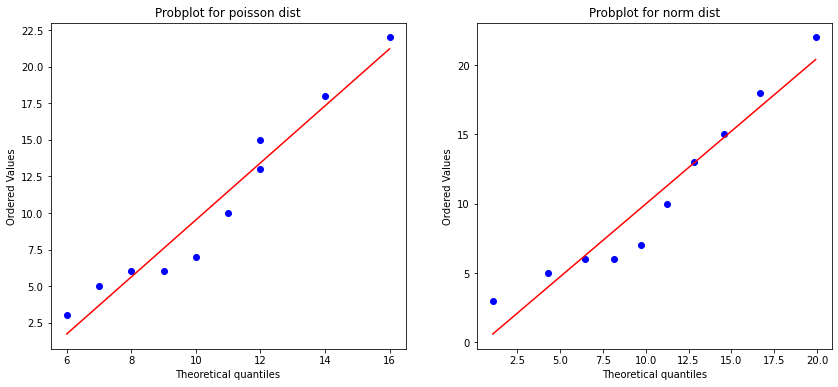

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
res = st.probplot(x, dist=st.poisson(mu), plot=ax1)
res = st.probplot(x, dist=st.norm(mu, std), plot=ax2)
ax1.set_title("Probplot for poisson dist")
ax2.set_title("Probplot for norm dist")
plt.show()

Исходя из всех вышеприведенных тестов и графиков можно сделать следующий вывод: выборка описывается нормальным распределением

P.S. Если для определения типа распределения нельзя пользоваться компьютером, то можно просто посмотреть на гистограмму и сделать такое же предположение (так как данных слишком мало, то какое-либо адекватное предположение сделать довольно трудно)

Таким образом, формальная запись задачи будет выглядеть следующим образом:

Дана выборка $X = [3,22,13,6,18,5,6,10,7,15]$ из нормального распределения. Проверить гипотезу о том, что дисперсия распределения равна $9$ против правосторонней альтернативы: 

$H_0: \; \sigma_0 = 9$

$H_1: \; \sigma_0 > 9$

В качестве статистики рассмотрим $T(X)=\frac{1}{\sigma_0^2}\sum\limits_{k=1}^{n}\big(x_i-\overline{x}\big)^2 = (n-1)\frac{S^2}{\sigma_0^2}\sim \chi^2(n-1)$, где $S^2 = \frac{1}{n-1}\sum\limits_{k=1}^{n}\big(x_i-\overline{x}\big)^2$

Оценим $p\_value$ для случая правосторонней альтернативы. $p\_value = P\big(T>T(X)|H_0\big) = 1-F_{\chi^2(n-1)}\big(T(X)\big)$.

Если $p\_value < 0.05$, то отклолняем нулевую гипотезу.


Альтернативный вариант: можно оценить критическое значение $T$, как $\chi^2_{1-\alpha}\big(n-1\big)$. Здесь и далее $\chi^2_{1-\alpha}\big(n-1\big)$ - это $1-\alpha$ квантиль распределения $\chi^2\big(n-1\big)$.

В этом случае, если $T(X)>T$, то отклоняем нулевую гипотезу. 

In [6]:
n = len(x)
alpha=0.05
T = (1/9**2)*sum((x-np.mean(x))**2)

print('p_value = {}, alpha = {}'.format(st.chi2.sf(T, df=n-1), alpha)) # sf = 1 - cdf
print('T = {}, T(X) = {}'.format(st.chi2.ppf(q=1-alpha, df=n-1), T))

p_value = 0.8849297659664598, alpha = 0.05
T = 16.918977604620448, T(X) = 4.376543209876543


В нашем случае $p\_value = 0.88 > 0.05$ (ну или $T(X) = 4.4 < 16.9 = T$). Следовательно, не отклоняем нулевую гипотезу о том, что дисперсия равна $9$.

Теперь получим доверительный интервал для значения дисперсии при $\alpha=0.05$

Хотим построить доверительный интервал $[T_1(X), T_2(X)]$ такой, что $P\big(T_1(X)<\sigma^2<T_2(X)\big) \ge 1-\alpha$

$$P\Bigg(\chi^2_{\frac{\alpha}{2}}(n-1) < (n-1)\frac{S^2}{\sigma^2} < \chi^2_{1-\frac{\alpha}{2}}(n-1)\Bigg) = 1-\alpha$$

$$P\Bigg(\frac{\chi^2_{\frac{\alpha}{2}}(n-1)}{(n-1)S^2} < \frac{1}{\sigma^2} < \frac{\chi^2_{1-\frac{\alpha}{2}}(n-1)}{(n-1)S^2}\Bigg) = 1-\alpha$$

$$P\Bigg(\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}}(n-1)} < \sigma^2 < \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}\Bigg) = 1-\alpha$$

$$T_1(X) = \frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}}(n-1)}, T_2(X) = \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}$$

In [7]:
n = len(x)
S2 = 1/(n-1)*sum((x-np.mean(x))**2) # S2 = np.std(x, ddof=1)**2

left = (n-1)*S2/st.chi2.ppf(q=1-alpha/2, df=n-1)
right = (n-1)*S2/st.chi2.ppf(q=alpha/2, df=n-1)

print('Confidence interval for sigma squared = [{}, {}]'.format(round(left, 2), round(right, 2)))
print('Confidence interval for sigma = [{}, {}]'.format(round(np.sqrt(left), 2), round(np.sqrt(right), 2)))

Confidence interval for sigma squared = [18.64, 131.28]
Confidence interval for sigma = [4.32, 11.46]


Доверительный интервал для $\sigma$ - $[T_1(X), T_2(X)] = [4.32, 11.46]$, то есть $P\big(\sigma \in [4.32, 11.46]\big) \ge 0.95$